In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [2]:
def draw(results, results_momentum, yrange, regimes=False, momentum_curve = False, save_name = None, xrange_new = None): 


    lr_results = [r[0] for r in results]
    outcomelist = [r[1] for r in results]
    losslist = [r[2] for r in results]
    norm = [r[3] for r in results]
    sharpness = [r[4] for r in results]
    acclist = [r[5] for r in results]

    index = [i for i in range(len(outcomelist)) if outcomelist[i] != 'diverge']
    lr_results = [lr_results[i] for i in index]
    outcomelist = [outcomelist[i] for i in index]
    losslist = [losslist[i] for i in index]
    norm = [norm[i] for i in index]
    sharpness = [sharpness[i] for i in index]
    acclist = [acclist[i] for i in index]

    fig, axs = plt.subplots(1,4, figsize=(22, 4.5))

    FS = 14
    color = []
    for i in range(len(outcomelist)):
        if outcomelist[i] == 'converge':
            color.append('tab:green')
        else:
            color.append('tab:orange')   



    ax = axs[0]
    ax.plot(lr_results, norm, linewidth=0.2, zorder=1)
    ax.scatter(lr_results, norm, c=color, s=5, marker='o', zorder=2)
    ax.set_ylim(yrange[0][0], yrange[0][1])
    ax.set_xlim(min(lr_results)-0.01, max(lr_results)+0.01)
    ax.set_xlabel(r'Step size $\eta$', fontsize=FS)
    ax.set_ylabel('Final norm', fontsize=FS)
    ax.set_title(r'Vanilla GD', fontsize=FS)

    if xrange_new != None:
        ax.set_xlim(xrange_new[0], xrange_new[1])


    from matplotlib.lines import Line2D

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Global minimum',
            markerfacecolor='tab:green', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Failed to attain optimality',
            markerfacecolor='tab:orange', markersize=8)
    ]


    ax = axs[1]
    ax.plot(lr_results, sharpness, linewidth=0.2, zorder=1)
    ax.scatter(lr_results, sharpness, c=color, s=5, marker='o', zorder=2)
    ax.set_ylim(yrange[1][0], yrange[1][1])
    ax.set_xlim(min(lr_results)-0.01, max(lr_results)+0.01)
    ax.set_xlabel(r'Step size $\eta$', fontsize=FS)
    ax.set_ylabel('Final sharpness', fontsize=FS)
    ax.plot(lr_results, 2/np.array(lr_results), 'k--')

    legend_elements_with_line = legend_elements + [
        Line2D([0], [0], color='k', linestyle='--', label=r'$2/\eta$')
    ]
    ax.legend(handles=legend_elements_with_line, fontsize=FS)
    ax.set_title(r'Vanilla GD', fontsize=FS)

    if xrange_new != None:
        ax.set_xlim(xrange_new[0], xrange_new[1])




    ########################################################



    lr_results_momentum = [r[0] for r in results_momentum]
    outcomelist_momentum = [r[1] for r in results_momentum]
    losslist_momentum = [r[2] for r in results_momentum]
    norm_momentum = [r[3] for r in results_momentum]
    sharpness_momentum = [r[4] for r in results_momentum]
    acclist_momentum = [r[5] for r in results_momentum]

    index = [i for i in range(len(outcomelist_momentum)) if outcomelist_momentum[i] != 'diverge']
    lr_results_momentum = [lr_results_momentum[i] for i in index]
    outcomelist_momentum = [outcomelist_momentum[i] for i in index]
    losslist_momentum = [losslist_momentum[i] for i in index]
    norm_momentum = [norm_momentum[i] for i in index]
    sharpness_momentum = [sharpness_momentum[i] for i in index]
    acclist_momentum = [acclist_momentum[i] for i in index]



    color = []
    for i in range(len(outcomelist_momentum)):
        if outcomelist_momentum[i] == 'converge':
            color.append('tab:green')
        else:
            color.append('tab:orange') 


    ax = axs[2]
    ax.plot(lr_results_momentum, norm_momentum, linewidth=0.2, zorder=0)
    ax.scatter(lr_results_momentum, norm_momentum, c=color, s=5, marker='o', zorder=1)
    ax.set_ylim(yrange[2][0], yrange[2][1])
    ax.set_xlim(min(lr_results_momentum)-0.005, max(lr_results_momentum)+0.005)
    ax.set_xlabel(r'Step size $\eta$', fontsize=FS)
    ax.set_ylabel('Final norm', fontsize=FS)
    ax.set_title(r'Polyak momentum $\beta=0.9$', fontsize=FS)

    from matplotlib.lines import Line2D

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Global minimum',
            markerfacecolor='tab:green', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Failed to attain optimality',
            markerfacecolor='tab:orange', markersize=8)
    ]

    beta = .9
    ax = axs[3]
    ax.plot(lr_results_momentum, sharpness_momentum, linewidth=0.2, zorder=0)
    ax.scatter(lr_results_momentum, sharpness_momentum, c=color, s=5, marker='o', zorder=1)
    ax.set_ylim(yrange[3][0], yrange[3][1])
    ax.set_xlim(min(lr_results_momentum)-0.005, max(lr_results_momentum)+0.005)
    ax.set_xlabel(r'Step size $\eta$', fontsize=FS)
    ax.set_ylabel('Final sharpness', fontsize=FS)
    ax.set_title(r'Polyak momentum $\beta=0.9$', fontsize=FS)

    if momentum_curve:
        ax.plot(lr_results_momentum, (2+2*beta)/np.array(lr_results_momentum), 'k--')

        legend_elements = legend_elements + [
            Line2D([0], [0], color='k', linestyle='--', label=r'$(2+2\beta)/\eta$')
        ]
    
    ax.legend(handles=legend_elements, fontsize=FS)

    if regimes:
        ax=axs[0]
        ax.axvspan(0, 0.05, color='skyblue', alpha=0.15, zorder=0)
        ax.text(0.025, 8.9, "EoS\nregime", color='tab:blue',
                fontsize=FS, va='top', ha='center')#, alpha=0.9)
        ax.axvspan(0.06, ax.get_xlim()[1], color='lightcoral', alpha=0.1, zorder=0)
        ax.text(0.06 + (ax.get_xlim()[1]-0.06)*0.5, 8.9, 
                "Chaotic\nregime", color='tab:red',
                fontsize=FS, va='top', ha='center')



        ax=axs[1]
        ax.axvspan(0, 0.05, color='skyblue', alpha=0.15, zorder=0)
        ax.text(0.025, 50, "EoS\nregime", color='tab:blue',
                fontsize=FS, va='top', ha='center')#, alpha=0.9)
        ax.axvspan(0.06, ax.get_xlim()[1], color='lightcoral', alpha=0.1, zorder=0)
        ax.text(0.06 + (ax.get_xlim()[1]-0.06)*0.5, 50, 
                "Chaotic\nregime", color='tab:red',
                fontsize=FS, va='top', ha='center')

    if save_name != None:
        plt.savefig(save_name, dpi=300, bbox_inches='tight')

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(15)

transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

selected_classes = [0, 1]
samples_per_class = 25

all_targets = torch.tensor(trainset.targets)

indices_per_class = []
for c in selected_classes:
    cls_idx = (all_targets == c).nonzero(as_tuple=True)[0]
    cls_idx = cls_idx[torch.randperm(len(cls_idx))[:samples_per_class]]
    indices_per_class.append(cls_idx)

indices = torch.cat(indices_per_class)

data_subset = torch.stack([trainset[i][0] for i in indices])
targets_subset = all_targets[indices]

print('Subset shape:', data_subset.shape)
print('Subset labels:', targets_subset.shape)
print('Class distribution:', torch.bincount(targets_subset))

Files already downloaded and verified
Subset shape: torch.Size([50, 3, 32, 32])
Subset labels: torch.Size([50])
Class distribution: tensor([25, 25])


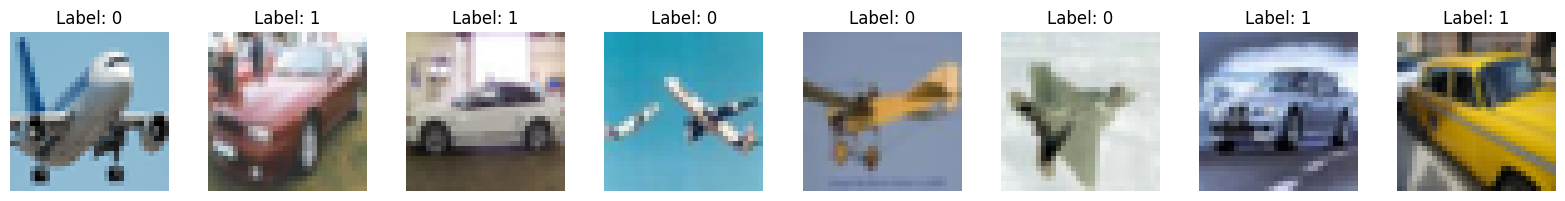

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 8, figsize=(16, 2))
for i in range(8):
    idx = torch.randint(0, data_subset.shape[0], (1,)).item()
    img = data_subset[idx]
    label = targets_subset[idx].item()
    axs[i].imshow(img.permute(1, 2, 0).numpy())
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')
plt.tight_layout()
plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from pyhessian import hessian
import os
from joblib import Parallel, delayed


class Net(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )
    def forward(self, x):
        return self.net(x)


class tanhNet(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 100),
            nn.Tanh(),
            nn.Linear(100, 100),
            nn.Tanh(),
            nn.Linear(100, 1)
        )
    def forward(self, x):
        return self.net(x) 


def train_one_lr_worker(lr, beta=0., activation='relu', loss_type='mse'):
    

    torch.manual_seed(seed) 
    

    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    

    X_dev = X.to(device)
    y_dev = y.to(device)


    if activation == 'relu':
        model = Net(X.shape[1])
    elif activation == 'tanh':
        model = tanhNet(X.shape[1])
    else:
        raise ValueError(f"Unsupported activation function: {activation}")
    
    model.to(device) 
    
    if loss_type == 'mse':
        criterion_train = nn.MSELoss() 
    elif loss_type == 'cross_entropy':
        criterion_train = nn.BCEWithLogitsLoss()
    else:
        raise ValueError(f"Unsupported loss function: {loss_type}")
    
    
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=beta)
    

    outcome = 'non-global min or saddle'
    epoch = 0 


    for epoch in range(epochs):
        model.train()


        optimizer.zero_grad()
        preds = model(X_dev)
        loss = criterion_train(preds, y_dev)
        loss_epoch = loss.item()
        loss.backward()
        optimizer.step()
        
        if activation == 'relu':
            if loss_type == "mse":
                if loss_epoch > 1e4:
                    outcome = 'diverge'
                    break
                elif loss_epoch < 1e-6:
                    outcome = 'converge'
                    break
                
            elif loss_type == "cross_entropy":
                if loss_epoch > 1e4:
                    outcome = 'diverge'
                    break
                elif loss_epoch < 1e-2: 
                    outcome = 'converge'
                    break
        
        elif activation == 'tanh':
            if loss_type == 'mse':
                if loss_epoch > 1e4:
                    outcome = 'diverge'
                    break
                elif loss_epoch < 1e-4:
                    outcome = 'converge'
                    break
            elif loss_type == 'cross_entropy':
                if loss_epoch > 1e4:
                    outcome = 'diverge'
                    break
                elif loss_epoch < 1e-2: 
                    outcome = 'converge'
                    break
    
    final_norm = 0.0
    train_acc = 0.0
    final_sharpness = 0.0


    model.eval()
    with torch.no_grad():

        vec = torch.cat([p.cpu().view(-1) for p in model.parameters()])
        final_norm = vec.norm().item()


        if loss_type == 'mse':
            preds_cls = (preds >= 0.5).float()
        elif loss_type == 'cross_entropy':
            preds_cls = (preds >= 0.0).float()
        train_acc = (preds_cls == y_dev).float().mean().item()


    model.to("cpu") 
    
    if loss_type == 'mse':
        criterion_cpu = nn.MSELoss() 
    elif loss_type == 'cross_entropy':
        criterion_cpu = nn.BCEWithLogitsLoss()
    else:
        raise ValueError(f"Unsupported loss function: {loss_type}")
    
    hessian_comp = hessian(model, criterion_cpu, data=(X, y), cuda=False)
    top_eigenvalues, _ = hessian_comp.eigenvalues()
    final_sharpness = top_eigenvalues[0]

    print(f"lr={lr:.4f}, outcome: {outcome}, loss={loss_epoch:.8f}, norm={final_norm:.4f}, sharpness={final_sharpness:.4f}, train acc={train_acc:.4f}, epoch={epoch}")
    return (lr, outcome, loss_epoch, final_norm, final_sharpness, train_acc)


In [6]:
# RELU MSE

seed = 15
torch.manual_seed(seed) 

X = data_subset.view(data_subset.size(0), -1).float()
y = targets_subset.float().unsqueeze(1)


# No-Momentum
epochs = 5000
lr_list = np.linspace(0.01, 0.15, 500)
n_cores = os.cpu_count()
results1 = Parallel(n_jobs=n_cores, verbose=0)(
    delayed(train_one_lr_worker)(lr, activation='relu', loss_type='mse') for lr in lr_list
)


# Momentum
epochs = 5000 
lr_list_momentum = np.linspace(0.005, 0.07, 500) 
n_cores = os.cpu_count()
results_momentum1 = Parallel(n_jobs=n_cores, verbose=0)(
    delayed(train_one_lr_worker)(lr, beta = 0.9) for lr in lr_list_momentum
)

/Users/shuang/opt/anaconda3/envs/phomology/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


lr=0.0125, outcome: converge, loss=0.00000100, norm=8.2697, sharpness=156.4196, train acc=1.0000, epoch=2358


/Users/shuang/opt/anaconda3/envs/phomology/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


lr=0.0111, outcome: converge, loss=0.00000100, norm=8.2686, sharpness=178.4268, train acc=1.0000, epoch=2567


/Users/shuang/opt/anaconda3/envs/phomology/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


lr=0.0122, outcome: converge, loss=0.00000099, norm=8.2704, sharpness=160.3698, train acc=1.0000, epoch=2614


/Users/shuang/opt/anaconda3/envs/phomology/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/Users/shuang/opt/anaconda3/envs/phomology/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid

lr=0.0108, outcome: converge, loss=0.00000100, norm=8.2684, sharpness=183.3877, train acc=1.0000, epoch=3052
lr=0.0103, outcome: converge, loss=0.00000100, norm=8.2681, sharpness=196.4472, train acc=1.0000, epoch=2837
lr=0.0120, outcome: converge, loss=0.00000100, norm=8.2694, sharpness=164.6841, train acc=1.0000, epoch=2855


/Users/shuang/opt/anaconda3/envs/phomology/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/Users/shuang/opt/anaconda3/envs/phomology/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid

lr=0.0114, outcome: converge, loss=0.00000100, norm=8.2688, sharpness=175.0314, train acc=1.0000, epoch=2911
lr=0.0117, outcome: converge, loss=0.00000100, norm=8.2691, sharpness=168.7564, train acc=1.0000, epoch=2922
lr=0.0100, outcome: converge, loss=0.00000097, norm=8.2680, sharpness=196.2285, train acc=1.0000, epoch=3211


/Users/shuang/opt/anaconda3/envs/phomology/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


lr=0.0106, outcome: converge, loss=0.00000099, norm=8.2683, sharpness=185.7994, train acc=1.0000, epoch=3162
lr=0.0128, outcome: converge, loss=0.00000100, norm=8.2696, sharpness=153.6867, train acc=1.0000, epoch=2623
lr=0.0134, outcome: converge, loss=0.00000099, norm=8.2702, sharpness=145.4835, train acc=1.0000, epoch=2574
lr=0.0131, outcome: converge, loss=0.00000100, norm=8.2701, sharpness=152.5482, train acc=1.0000, epoch=2678
lr=0.0148, outcome: converge, loss=0.00000098, norm=8.2717, sharpness=133.9064, train acc=1.0000, epoch=2282
lr=0.0153, outcome: converge, loss=0.00000100, norm=8.2729, sharpness=129.1766, train acc=1.0000, epoch=2279
lr=0.0145, outcome: converge, loss=0.00000100, norm=8.2714, sharpness=134.9323, train acc=1.0000, epoch=2350
lr=0.0151, outcome: converge, loss=0.00000100, norm=8.2727, sharpness=133.0145, train acc=1.0000, epoch=2375
lr=0.0139, outcome: converge, loss=0.00000100, norm=8.2715, sharpness=142.2758, train acc=1.0000, epoch=2451
lr=0.0136, outcome:

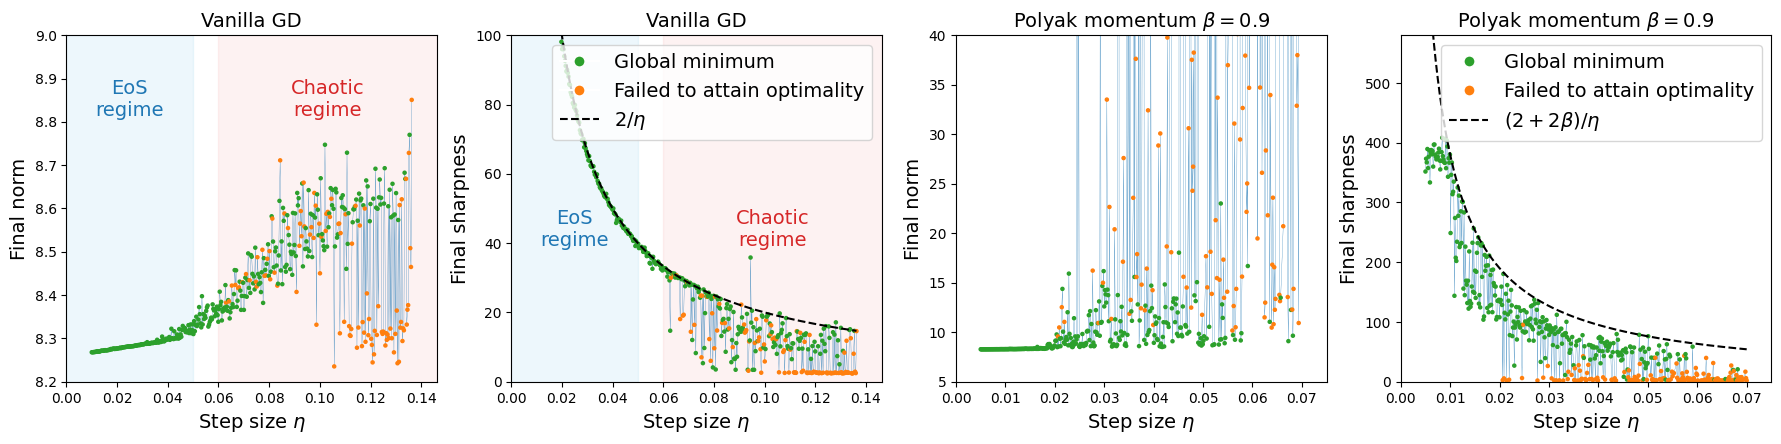

In [7]:
yrange = [[8.2, 9], [0, 100], [5, 40], [0, 580]]
draw(results1, results_momentum1, yrange, regimes=True, momentum_curve = True, save_name = "output/Fig4.png")